In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.constants as const
import sys
sys.path.append('../../Graphene')
import RamanGraphene as rg

In [2]:
def convert_nm_to_ev(wavelength):
    return const.h * const.c / (wavelength * 1e-9) / const.e

x_axis_nm = np.loadtxt('calibration_x_axis.txt')
x_axis_ev = convert_nm_to_ev(x_axis_nm)

In [3]:
#Reference spectra
suspended_data = np.loadtxt('Suspended_WSe2_1layer_633nm_1uW_150gr_mm_center_750nm_12s_1.dat')[:,1]
supported_data = np.loadtxt('Non_Suspended_WSe2_1layer_633nm_1uW_150gr_mm_center_750nm_12s_1.dat')[:,1]

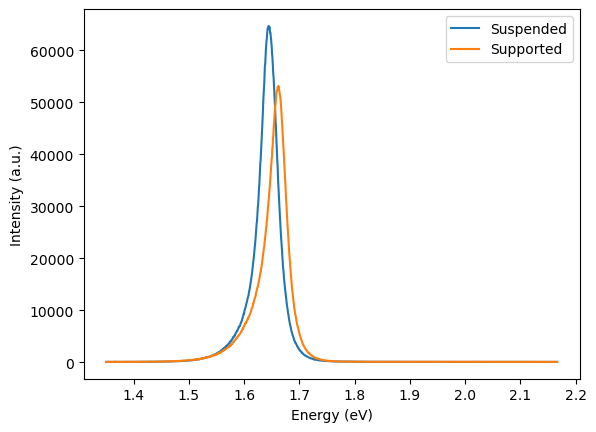

In [4]:
#Reference spectra plot
plt.plot(x_axis_ev, suspended_data, label='Suspended')
plt.plot(x_axis_ev, supported_data, label='Supported')
plt.xlabel('Energy (eV)')
plt.ylabel('Intensity (a.u.)')
plt.legend()
plt.show()

In [4]:
#Qmat room map analysis
raw_data_map = rg.get_map_data('Map/LRVI_H12P1_1-4__2024-12-18_16-28-37_tot.dat')
noise, data = rg.separate_data_noise(raw_data_map)
data = data - noise

In [5]:
map_size = (11,11)
x_range, data_range, the_map = rg.make_map(x_axis_ev, data, map_size, 1 ,2)
data_matrix = np.reshape(data_range, (len(x_range), map_size[0], map_size[1]))
print(np.shape(data_matrix))

(1161, 11, 11)


In [11]:
%matplotlib qt
# Inverted positions compared to the clickable map script

plt.figure(figsize=(6,6))

plt.plot(x_range, data_matrix[:,6, 5], color = 'b', label = 'Presumed suspended regions')
plt.plot(x_range, data_matrix[:,6,6], color = 'b')
plt.plot(x_range, data_matrix[:,6, 4], color = 'b')
plt.plot(x_range, data_matrix[:,9, 10], color = 'r', label = 'Supported regions')
plt.plot(x_range, data_matrix[:,9, 8], color = 'r')
plt.plot(x_range, data_matrix[:,9, 9], color = 'r')

plt.ylim(-900, 1.15*np.max(data_matrix))
plt.xlim(1.5, 1.8)
plt.xlabel('Energy (eV)', fontsize=15)
plt.ylabel('Intensity (a.u.)', fontsize=15)


plt.legend(fontsize=15, loc='upper left')
#plt.savefig('Figures/PL_map_spectra.pdf')
plt.show()

In [6]:
from scipy.signal import find_peaks

peaks_positions = np.zeros((map_size[0], map_size[1]))
peaks_intensities = np.zeros((map_size[0], map_size[1]))
for i in range(map_size[0]):
    for j in range(map_size[1]):
        peaks, properties = find_peaks(data_matrix[:,i,j], prominence=100, width=10)

        if peaks.size > 0: #if there are peaks...
            peaks_positions[i, j] = x_range[peaks]
            peaks_intensities[i, j] = properties['prominences'][0]
        else:
            peaks_positions[i, j] = 0
            peaks_intensities[i, j] = 0

#peaks, properties = find_peaks(data_matrix[:,i,j], prominence=10000)
#print(properties)
print(np.shape(peaks_positions))


(11, 11)


/tmp/ipykernel_7049/3941346169.py:10: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  peaks_positions[i, j] = x_range[peaks]


In [13]:
# Peak positions map
%matplotlib qt
fig,ax = plt.subplots()

cax = ax.imshow(peaks_positions, cmap=plt.cm.jet, interpolation='nearest', vmin = 1.62, vmax = 1.675)

#plt.title('Peak position map')
ax.set_xlabel(r'$\mu$m', fontsize = 14)
ax.set_ylabel(r'$\mu$m', fontsize = 14)
colorbar = fig.colorbar(cax)
colorbar.ax.tick_params(labelsize=14)
colorbar.set_label('Energy (eV)', fontsize=14)
plt.savefig('Figures/Peak_positions_map.pdf')
plt.show()

In [19]:
fig,ax = plt.subplots()

cax = ax.imshow(the_map, cmap=plt.cm.jet, interpolation='nearest')

#plt.title('Integrated intensity map')
ax.set_xlabel(r'$\mu$m', fontsize = 14)
ax.set_ylabel(r'$\mu$m', fontsize = 14)
colorbar = fig.colorbar(cax)
colorbar.ax.tick_params(labelsize=14)
colorbar.set_label('Integrated intensity (a.u.)', fontsize=14)
plt.savefig('Figures/Integrated_intensity_PL_map.pdf')
plt.show()

In [117]:

# Convert peak_positions and the_map to 1-dimensional arrays
peak_positions_1d = peaks_positions.flatten()
peaks_intensities_1d = peaks_intensities.flatten()
integrated_intensity_1d = the_map.flatten()

# Plot peak_positions vs the_map values
plt.scatter(integrated_intensity_1d, peak_positions_1d)
plt.xlabel('Integrated intensity (a.u.)')
plt.ylabel('Peak position (eV)')   
plt.ylim(1.55, 1.69)
plt.title('Peak Positions vs Integrated intensity')
plt.show()